# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open("speeches-201718.json.bz2") as source:
    speeches_201718 = pd.read_json(source)

with bz2.open("speeches-201819.json.bz2") as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [4]:
parties = sorted(training_data["party"].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by plotting a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

Text(0.5, 1.02, 'Bar plot for 2017-18 dataset')

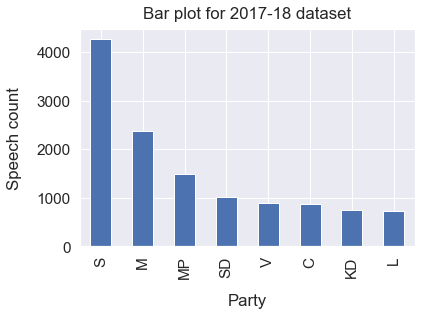

In [5]:
#Creating bar plots
import matplotlib.pyplot as plt
import seaborn as ssn
%matplotlib inline
ssn.set(font_scale=1.4)

#plot 2017-18
training_data["party"].value_counts().plot(kind="bar")
plt.xlabel("Party", labelpad=14)
plt.ylabel("Speech count", labelpad=14)
plt.title("Bar plot for 2017-18 dataset", y=1.02)

Text(0.5, 1.02, 'Bar plot for 2018-19 dataset')

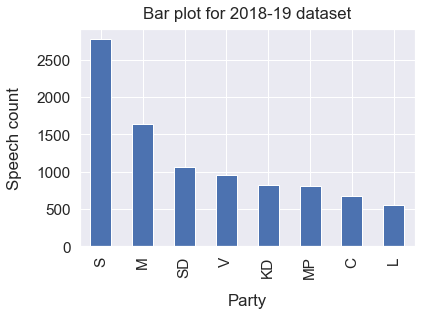

In [6]:
#plot 2018-19
test_data["party"].value_counts().plot(kind="bar")
plt.xlabel("Party", labelpad=14)
plt.ylabel("Speech count", labelpad=14)
plt.title("Bar plot for 2018-19 dataset", y=1.02)

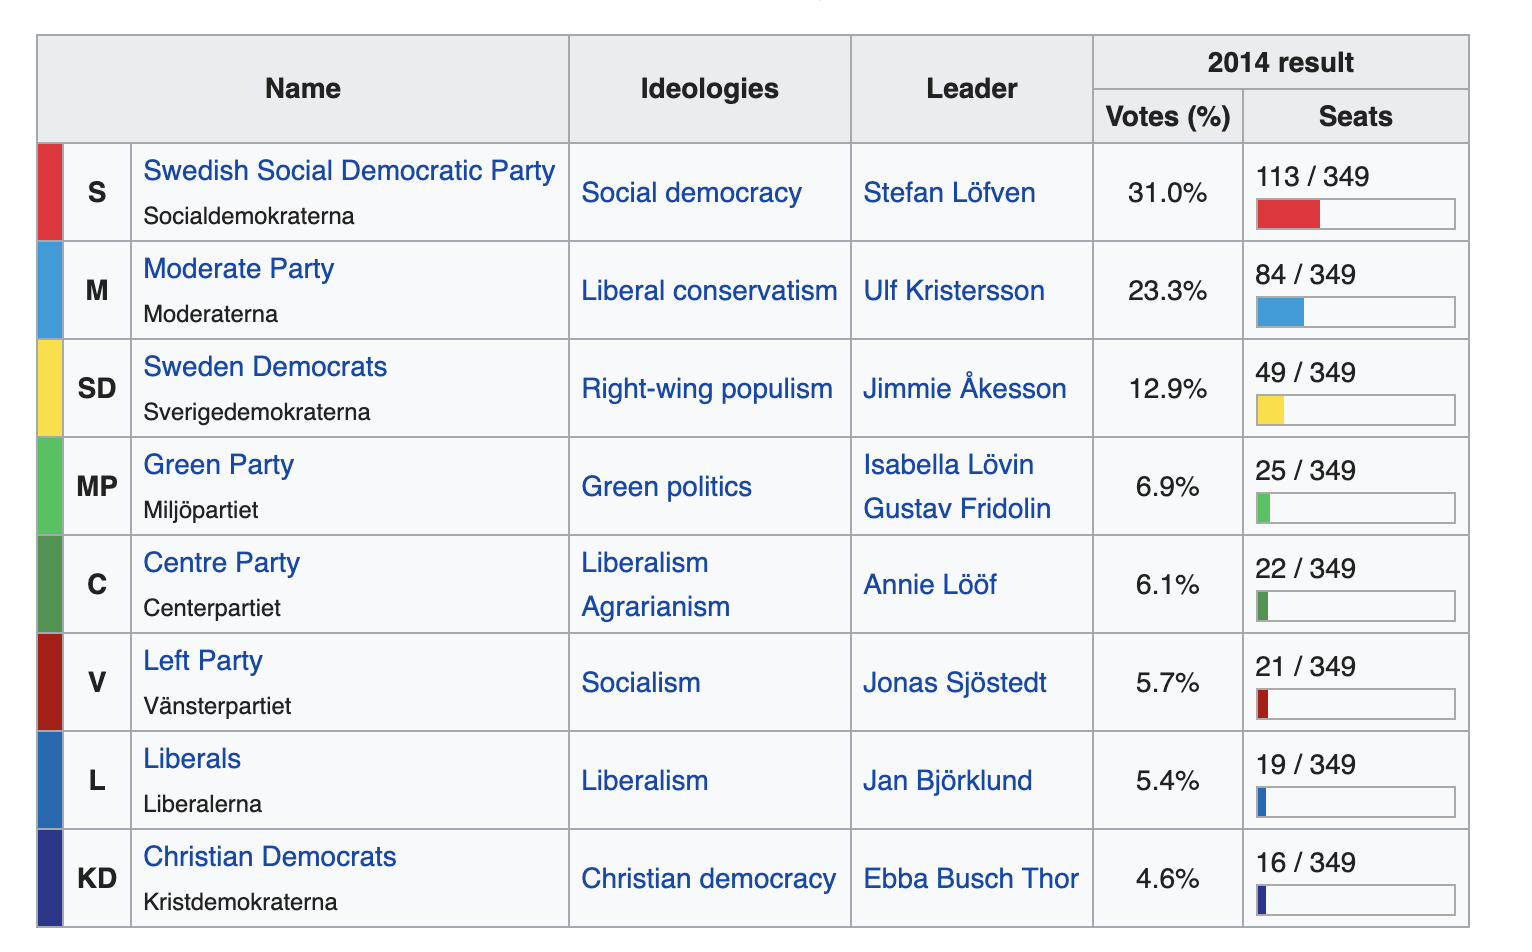

In [7]:
from IPython.display import Image
Image("img2014.png", width=700, height=600)

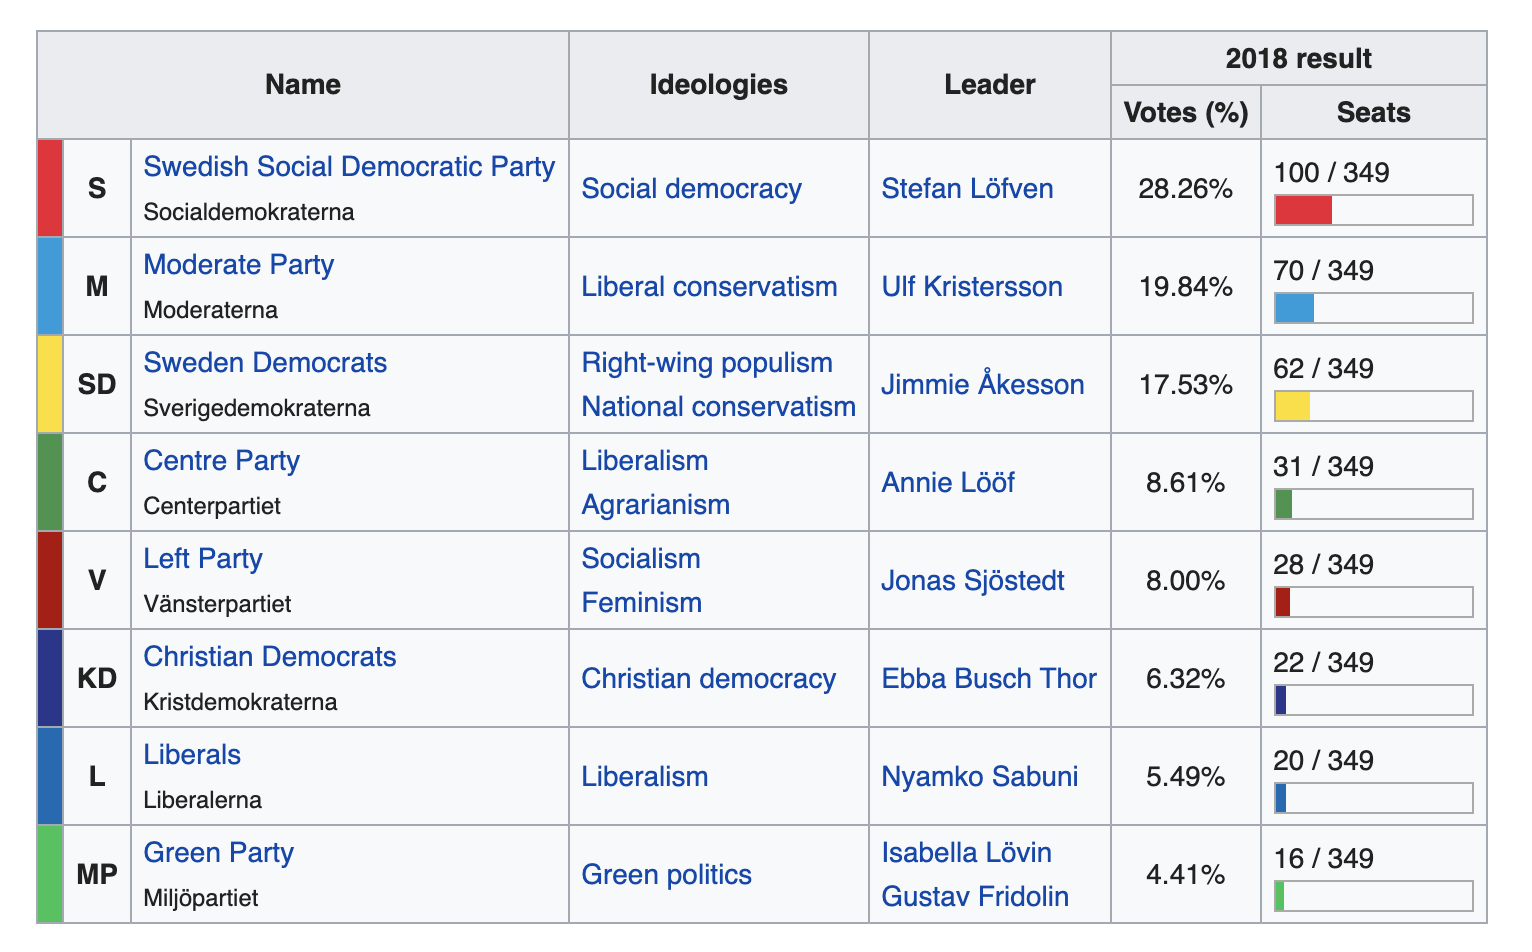

In [8]:
Image("img2018.png", width=700, height=600)

*TODO (Summary):The 2017 and 2018 dataset are pretty same on the type of distribution they follow. The speech count decreases a lot for the three leading parties in the 2017.
If we compare results of 2014 and 2018 parties S, M, SD are still top 3. But a drastic change was for party MP as in 2018 it was last where as in 2014 it stood 4th. It could be the low number of speeches in 2018*

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

#Creating the pipeline
vectorizer = CountVectorizer()
mnb = MultinomialNB()
pipe = Pipeline([('vect', vectorizer), ('mnb', mnb)])

In [10]:
pipe.fit(training_data['words'], training_data['party'])

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [11]:
#Prediction on train dataset
pred = pipe.predict(training_data['words'])
print("Prediction accuracy training data : ", sum(pred == training_data['party'])/pred.shape[0])
print(classification_report(training_data['party'], pred, parties))

Prediction accuracy training data :  0.7600259256258608
              precision    recall  f1-score   support

           C       0.98      0.45      0.62       865
          KD       0.98      0.33      0.49       743
           L       1.00      0.36      0.53       719
           M       0.62      0.95      0.75      2370
          MP       0.89      0.64      0.74      1481
           S       0.74      0.96      0.84      4261
          SD       0.96      0.59      0.73      1010
           V       0.95      0.66      0.78       894

    accuracy                           0.76     12343
   macro avg       0.89      0.62      0.69     12343
weighted avg       0.82      0.76      0.74     12343



In [12]:
#Prediction on test dataset
pred = pipe.predict(test_data['words'])
print("Prediction accuracy test data : ", sum(pred == test_data['party'])/pred.shape[0])
print(classification_report(test_data['party'], pred, parties))

Prediction accuracy test data :  0.4280792420327304
              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Would you have expected the results that you got?

No, these results were not expected. The train and the test dataset looked like they were distribured in a similar manner, and we did not expect the results on the rest set to be this bad. This is a clear indication that the model is overfitting the training data.

## Problem 3: Baseline

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline for text classification is **Most Frequent Class (MFC)**. One way to think of this baseline is as a classifier that, for every document, predicts that class which appears most often in the training data.

Determine the most frequent class in the 2017/2018 data. What is the accuracy of the MFC baseline on the test data? Given this baseline accuracy, how do you assess the results of the Naive Bayes classifier from Problem&nbsp;2? Answer with a short text.

In [13]:
# TODO: Write code here to print the baseline accuracy
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(training_data['words'], training_data['party'])
dummy_pred = dummy_clf.predict(test_data['words'])

#dummy_clf.score(training_data['words'],test_data['words'])
print(classification_report(test_data['party'], dummy_pred, target_names=parties))

c:\users\sridhar\desktop\textmining\venv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.00      0.00      0.00      1644
          MP       0.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       0.00      0.00      0.00      1060
           V       0.00      0.00      0.00       950

    accuracy                           0.30      9288
   macro avg       0.04      0.12      0.06      9288
weighted avg       0.09      0.30      0.14      9288



In [14]:
metrics.accuracy_score(test_data['party'], dummy_pred)

0.298557278208441

*TODO: Enter your answer here*

The results of our model are much better than the baseline accuracy that we got using the most frequent class

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [15]:
def underSampling(data, sampleSize=500):
    usamData = data[data['party'] == parties[0]].sample(sampleSize, replace=False)
    for i in range(1, len(parties)):
        usamData = pd.concat([usamData, data[data['party'] == parties[i]].sample(sampleSize, replace=False)])
        
    return(usamData)

In [16]:
usamTrainData = underSampling(training_data, sampleSize=719)

In [17]:
#fitting the undersampled data
pipe.fit(usamTrainData['words'], usamTrainData['party'])

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [18]:
#Prediction on the undersampled train dataset
pred = pipe.predict(usamTrainData['words'])
print("Prediction accuracy on undersampled training data: ", sum(pred == usamTrainData['party'])/pred.shape[0])
print(classification_report(usamTrainData['party'], pred, parties))

Prediction accuracy on undersampled training data:  0.9365438108484005
              precision    recall  f1-score   support

           C       0.96      0.95      0.95       719
          KD       0.94      0.96      0.95       719
           L       0.95      0.97      0.96       719
           M       0.85      0.97      0.91       719
          MP       0.97      0.88      0.92       719
           S       0.97      0.87      0.92       719
          SD       0.95      0.94      0.95       719
           V       0.92      0.96      0.94       719

    accuracy                           0.94      5752
   macro avg       0.94      0.94      0.94      5752
weighted avg       0.94      0.94      0.94      5752



In [19]:
#Prediction on test dataset
pred = pipe.predict(test_data['words'])
print("Prediction accuracy on test data : ", sum(pred == test_data['party'])/pred.shape[0])
print(classification_report(test_data['party'], pred, parties))

Prediction accuracy on test data :  0.3980404823428079
              precision    recall  f1-score   support

           C       0.25      0.43      0.32       671
          KD       0.30      0.41      0.35       821
           L       0.26      0.42      0.32       560
           M       0.39      0.47      0.43      1644
          MP       0.36      0.40      0.38       809
           S       0.83      0.28      0.42      2773
          SD       0.46      0.42      0.44      1060
           V       0.39      0.54      0.46       950

    accuracy                           0.40      9288
   macro avg       0.40      0.42      0.39      9288
weighted avg       0.50      0.40      0.40      9288



In [20]:
#Prediction on train dataset
pred = pipe.predict(training_data['words'])
print("Prediction accuracy on original training data : ", sum(pred == training_data['party'])/pred.shape[0])
print(classification_report(training_data['party'], pred, parties))

Prediction accuracy on original training data :  0.7009641092116989
              precision    recall  f1-score   support

           C       0.58      0.88      0.70       865
          KD       0.58      0.95      0.72       743
           L       0.65      0.97      0.78       719
           M       0.66      0.77      0.71      2370
          MP       0.74      0.67      0.71      1481
           S       0.96      0.47      0.63      4261
          SD       0.72      0.84      0.78      1010
           V       0.58      0.91      0.71       894

    accuracy                           0.70     12343
   macro avg       0.69      0.81      0.72     12343
weighted avg       0.76      0.70      0.69     12343



## Problem 5: Confusion matrix

A **confusion matrix** is a specific table layout that is useful when analysing the performance of a classifier. In this matrix, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Your task is to use the confusion matrix to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses $p$ with when it predicts the party of a speaker.

In [21]:
# TODO: Write code here to solve Problem 5
def getConfMat(data, pred, order):
    cfm = confusion_matrix(data, pred, order)
    return pd.DataFrame(cfm, index=order, columns=order)

In [22]:
getConfMat(training_data['party'], pred, parties)

,C,KD,L,M,MP,S,SD,V
C,764,17,8,45,5,3,11,12
KD,6,703,6,20,1,1,3,3
L,3,3,696,5,1,3,2,6
M,153,104,79,1826,39,20,89,60
MP,76,64,43,115,999,53,30,101
S,279,267,214,652,289,2005,177,378
SD,20,31,23,62,9,1,845,19
V,6,17,7,28,5,5,12,814


In [23]:
#to do analysis

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. (Why would that be a bad idea?) Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words model instead of the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting $n$-grams up to $n = 2$ (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [24]:
# TODO: Write code here to implement the grid search

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range':[[1, 1], [2, 2]], 'vect__analyzer':['word', 'char'], 'mnb__alpha':[0.1, 1]}
clf = GridSearchCV(pipe, parameters, cv=5 )
clf.estimator

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
clf.fit(usamTrainData['words'], usamTrainData['party'])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [27]:
clf.best_params_

{'mnb__alpha': 0.1, 'vect__analyzer': 'word', 'vect__ngram_range': [2, 2]}

In [28]:
#Prediction on the undersampled train dataset
pred = clf.predict(usamTrainData['words'])
print("Prediction accuracy training data : ", sum(pred == usamTrainData['party'])/pred.shape[0])
print(classification_report(usamTrainData['party'], pred, parties))

Prediction accuracy training data :  0.9994784422809457
              precision    recall  f1-score   support

           C       1.00      1.00      1.00       719
          KD       1.00      1.00      1.00       719
           L       1.00      1.00      1.00       719
           M       1.00      1.00      1.00       719
          MP       1.00      1.00      1.00       719
           S       1.00      1.00      1.00       719
          SD       1.00      1.00      1.00       719
           V       1.00      1.00      1.00       719

    accuracy                           1.00      5752
   macro avg       1.00      1.00      1.00      5752
weighted avg       1.00      1.00      1.00      5752



In [29]:
#Prediction on test dataset
pred = clf.predict(test_data['words'])
print("Prediction accuracy test data : ", sum(pred == test_data['party'])/pred.shape[0])
print(classification_report(test_data['party'], pred, parties))

Prediction accuracy test data :  0.42118863049095606
              precision    recall  f1-score   support

           C       0.29      0.44      0.35       671
          KD       0.30      0.37      0.33       821
           L       0.26      0.42      0.32       560
           M       0.42      0.45      0.44      1644
          MP       0.31      0.43      0.36       809
           S       0.75      0.39      0.52      2773
          SD       0.47      0.38      0.42      1060
           V       0.43      0.52      0.47       950

    accuracy                           0.42      9288
   macro avg       0.40      0.43      0.40      9288
weighted avg       0.49      0.42      0.43      9288



## Problem 6: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model. Did you manage to get better results than the ones that you obtained in Problem&nbsp;5? Answer with a short text.

In [30]:
# TODO: Write code here to search for a better model

In [31]:
def myPipe(vect, predic, tr_data, te_data, dataCol, labelCol, paramGrid, nFoldCV=5):
    classLabels = sorted(tr_data["party"].unique())
    
    pipe = Pipeline([('vect', vect), ('predic', predic)])
    
    clf = GridSearchCV(pipe, paramGrid, cv=nFoldCV )
    clf.fit(tr_data[dataCol], tr_data[labelCol])
    
    #predict accuracy on train data
    pred = clf.predict(tr_data[dataCol])
    print("Prediction accuracy training data : ", sum(pred == tr_data[labelCol])/pred.shape[0])
    print(classification_report(tr_data[labelCol], pred, classLabels))
    print(getConfMat(tr_data[labelCol], pred, classLabels), "\n\n")
    
    #predict accuracy on test data
    pred = clf.predict(te_data[dataCol])
    print("Prediction accuracy test data : ", sum(pred == te_data[labelCol])/pred.shape[0])
    print(classification_report(te_data[labelCol], pred, classLabels))
    print(getConfMat(te_data[labelCol], pred, classLabels), "\n\n")
    
    return clf

In [32]:
from sklearn.svm import SVC
model = myPipe(TfidfVectorizer(ngram_range=[1, 1]), 
               SVC(decision_function_shape='ovo', gamma='scale'),
               usamTrainData, test_data, 'words', 'party',
              {'predic__kernel':['rbf', 'poly', 'sigmoid']})
model.best_params_

Prediction accuracy training data :  0.9080319888734353
              precision    recall  f1-score   support

           C       0.92      0.90      0.91       719
          KD       0.90      0.90      0.90       719
           L       0.93      0.92      0.93       719
           M       0.85      0.90      0.88       719
          MP       0.91      0.89      0.90       719
           S       0.94      0.89      0.91       719
          SD       0.90      0.93      0.92       719
           V       0.91      0.93      0.92       719

    accuracy                           0.91      5752
   macro avg       0.91      0.91      0.91      5752
weighted avg       0.91      0.91      0.91      5752

      C   KD    L    M   MP    S   SD    V
C   647   10    7   23    7    6   12    7
KD   15  647    8   20   10    4    6    9
L     5   10  665   14    5    5    8    7
M    14   12    7  645    6   10   14   11
MP   12    9    9   16  638   10   12   13
S     5    6    4   17   19  642   

{'predic__kernel': 'sigmoid'}

*The best results we could get was using the SVM model from sklearn package. It had the best performance on the test dataset. We tried fittig a logistic classifier, decision tree and SVM and SVM outperformed the other two and multinomial naive bayes classifier on the performance on the test set.*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>